<a href="https://colab.research.google.com/github/JPeebles-DataScientist/Project1_Core/blob/main/Project1_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')



In [114]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [115]:
#How many rows and columns?
rows = df.shape[0]
cols = df.shape[1]

print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 8523
Columns: 12


In [116]:
#What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [117]:
#Are there duplicates?
duplicateRows = df[df.duplicated()]

In [118]:
# If so, drop any duplicates.
df.drop_duplicates(keep=False,inplace=True)


In [119]:
#Identify missing values.  Used https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345 to identify
df.loc[:, df.isnull().any()].columns


Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [120]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [121]:
#Rename LF/low fat columns to Low Fat and reg to Regular
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [122]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [123]:
# Ordinal Encoding 'Outlet Location Type'
replacement_dictionary = {'Tier 3':3, 'Tier 2':2, 'Tier 1':1}
df['Outlet_Location_Type'].replace(replacement_dictionary, inplace=True)
df['Outlet_Location_Type']

0       1
1       3
2       1
3       3
4       3
       ..
8518    3
8519    2
8520    2
8521    3
8522    1
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [124]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2.112871,2181.288914
std,4.643456,0.051598,62.275067,8.371760,0.812757,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,1.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,1.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,2.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,3.000000,13086.964800


In [125]:
#Format for Test Train Split
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [126]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [127]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [128]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [129]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [130]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd1c5cac7d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd1c5cac3d0>)])

In [131]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd1c5cac7d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd1c5cac3d0>)])

In [132]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [133]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [139]:
from sklearn.linear_model import LinearRegression


In [140]:
# Make a linear regression instance
reg = LinearRegression()

In [142]:
train_score = reg.score(X_train, y_train)
print(train_score)


ValueError: ignored

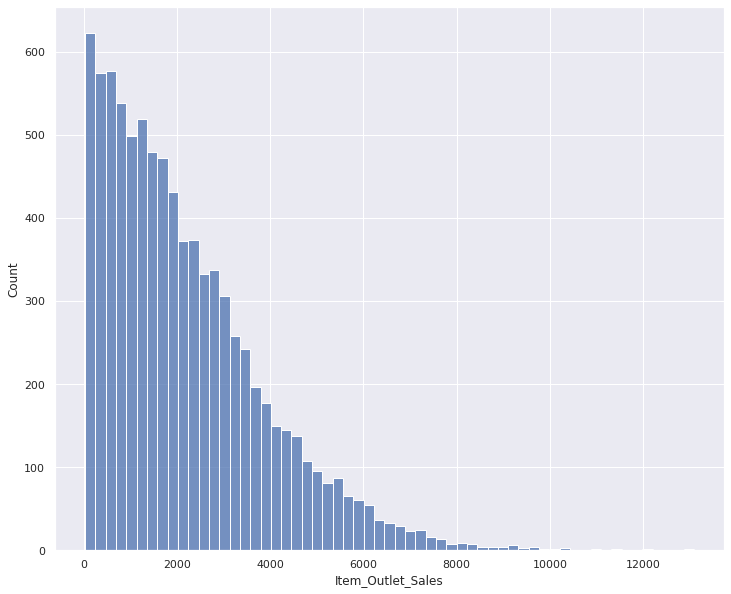

In [134]:
#Histogram to view the distributions of various features in your dataset.

sns.histplot(data = df
            ,x = 'Item_Outlet_Sales'
            )

The data is skewed to the left indicating there are more sales at the lower end of the range.

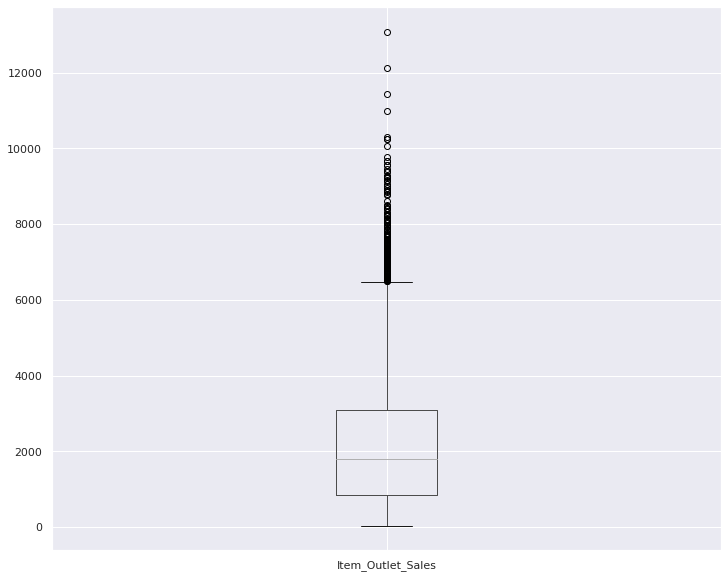

In [135]:
#Boxplot to view statistical summaries of various features in your dataset.

df.boxplot(column=[ 'Item_Outlet_Sales'])  


We might want to investigate as to why there are so many outliers in Outlet Sales. Is it based on seasonality? Was there a sale?

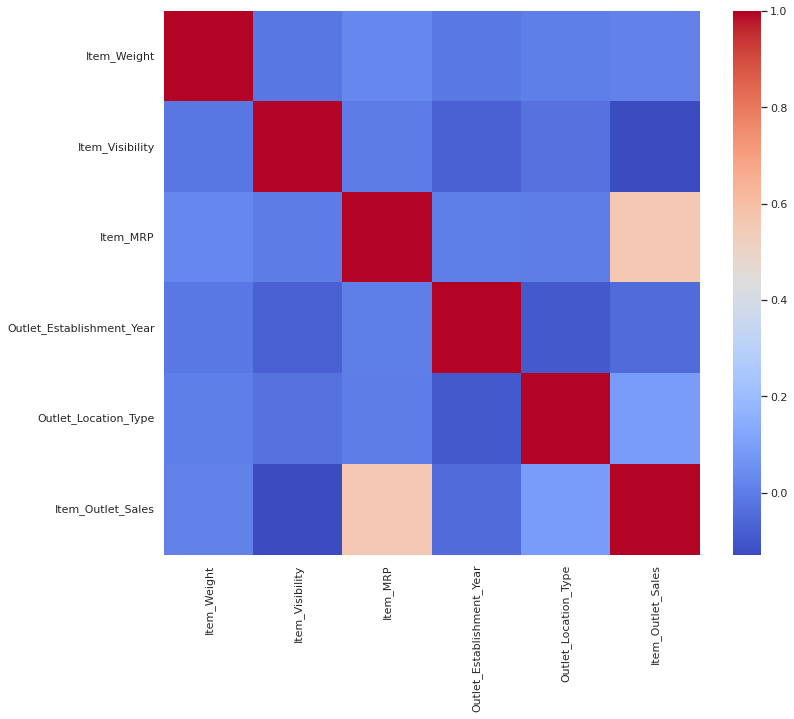

In [136]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')


outlet sales  and the MRP has a positive correlation though it is not strong. I anticipated that sales would be tied more to MRP than indicated by the data.

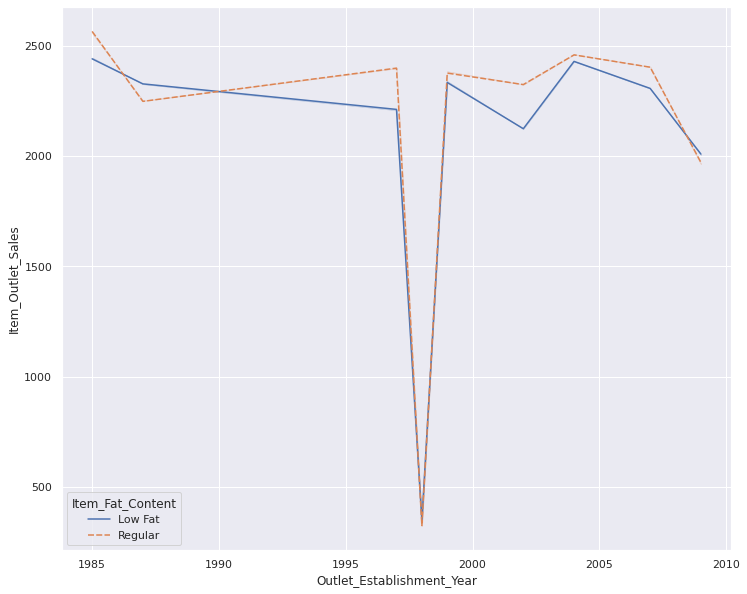

In [137]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df, hue = 'Item_Fat_Content', style = 'Item_Fat_Content', ci = False)

In 1998 there was a dip in sales considerably. We might want to research what happened that year to start the downward trend.

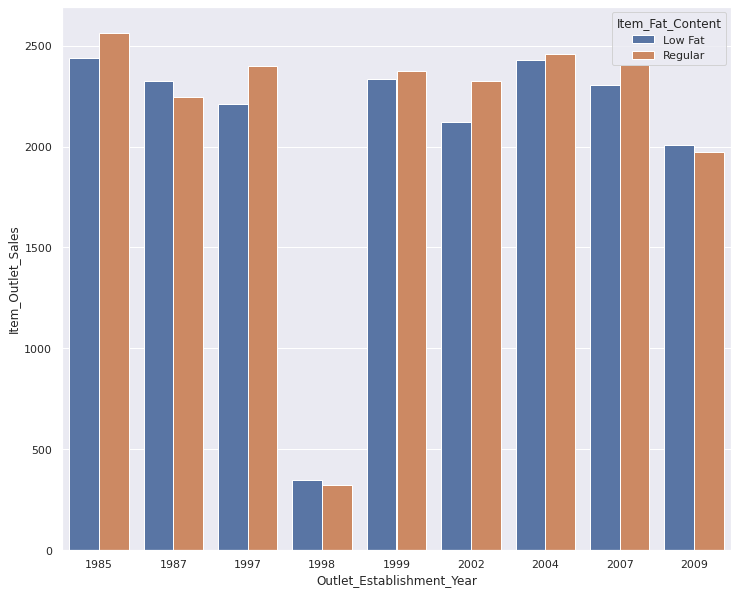

In [138]:
ax = sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df, ci = None, hue = 'Item_Fat_Content')
                 #hue = 'Item_Fat_Content', style = 'Item_Fat_Content')

Sales amongst the items seemed to be evenly distributed minus 1998.  Reg does better than the other categories.